## Notebook for Data Exploration & Customer Segmentation on Customer Spend Analysis

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from statsmodels.stats.weightstats import ztest
pd.set_option('display.max_rows', 500)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#read the input data
data = pd.read_csv('/Users/ankit/Data-Science/MTN Group/Customer Spend Behvarioural analytics/Input/Mall_customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Hypothesis 1 - Spending Habits vary based on gender

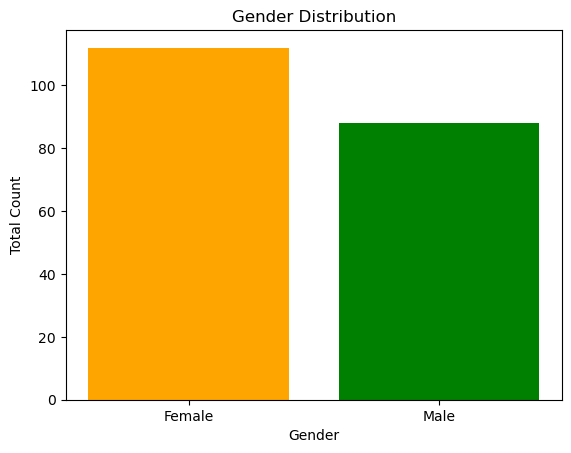

In [4]:
#Check the data distribution by Genre
gender_list = list(data['Genre'].value_counts().index.values)
values = list(data['Genre'].value_counts().values)

# create a bar graph
plt.bar(gender_list, values,color = ['orange', 'green'])

# add title and labels
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Total Count')

# show the graph
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


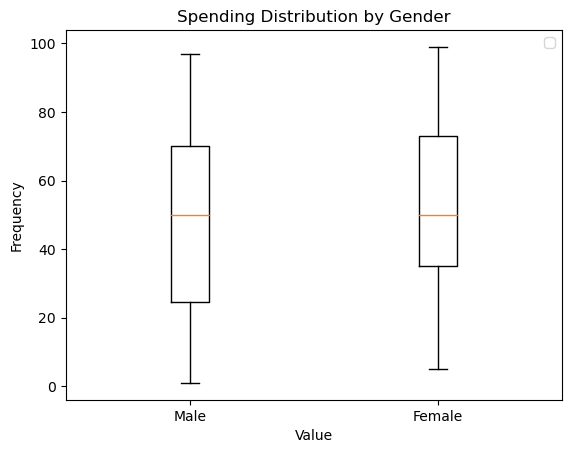

        count       mean       std  min   25%   50%   75%   max
Genre                                                          
Female  112.0  51.526786  24.11495  5.0  35.0  50.0  73.0  99.0
Male     88.0  48.511364  27.89677  1.0  24.5  50.0  70.0  97.0


In [5]:
#Check if there is a behavioural difference between the spendings of Male vs Female
male_spending = data[data['Genre']=='Male']['Spending_Score']
female_spending = data[data['Genre']=='Female']['Spending_Score']

# create a histogram with different groups
plt.boxplot([male_spending, female_spending], labels=['Male', 'Female'])

# add title and labels
plt.title('Spending Distribution by Gender')
plt.xlabel('Value')
plt.ylabel('Frequency')

# add legend
plt.legend()

# show the graph
plt.show()

print(data.groupby(['Genre'])['Spending_Score'].describe())

* Spending score for Female looks slightly higher than Male
* Verify if this difference is statistically significant

In [6]:
#Is there a statistically significant difference between the spending behaviour of Male & Female
#Run a statistical analysis to test this hypothesis

#Run a 2-Sample Z-Test (2-Tailed) 
# H0: Average spending score for Male is equal to average spending score for Female
# Ha: There is a significant difference between spending habits for Male and Female

#Significance level
alpha = 0.05

# Sample data
male_spending_score = data[data['Genre']=='Male']['Spending_Score']
female_spending_score = data[data['Genre']=='Female']['Spending_Score']

# Conduct the z-test
z_score, p_value = ztest(male_spending_score, female_spending_score)

print("The Z-Score is:",z_score)
print("The P-value is:",p_value)
# Compare the p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")
    
print("There is a statistically significant difference in the spending of habits of Female and Male")

The Z-Score is: -0.8190464150660333
The P-value is: 0.4127599324349568
Fail to reject the null hypothesis
There is a statistically significant difference in the spending of habits of Female and Male


---------------------------------------------

#### Hypothesis 2: Spending habits vary based on Annual income

In [7]:
#check the correlation between Annual Income and Spending Score
corr = data['Annual_Income_(k$)'].corr(data['Spending_Score'])
print("Correlation between Annual Income & Spending Score:",corr)
#There is no correlation between Annual Income and Spending score at an overall level

#Correlation between Annual Income and Spending Score by Gender
male_data = data[data['Genre']=='Male']
male_corr_spending_annual_income = male_data['Annual_Income_(k$)'].corr(male_data['Spending_Score'])
print("Correlation between Annual Income & Spending Score for Male:",male_corr_spending_annual_income)

#Correlation between Annual Income and Spending Score by Gender
female_data = data[data['Genre']=='Female']
female_corr_spending_annual_income = female_data['Annual_Income_(k$)'].corr(female_data['Spending_Score'])
print("Correlation between Annual Income & Spending Score for Female:",female_corr_spending_annual_income)

Correlation between Annual Income & Spending Score: 0.009902848094037608
Correlation between Annual Income & Spending Score for Male: -0.023684203755972282
Correlation between Annual Income & Spending Score for Female: 0.04754211694903911


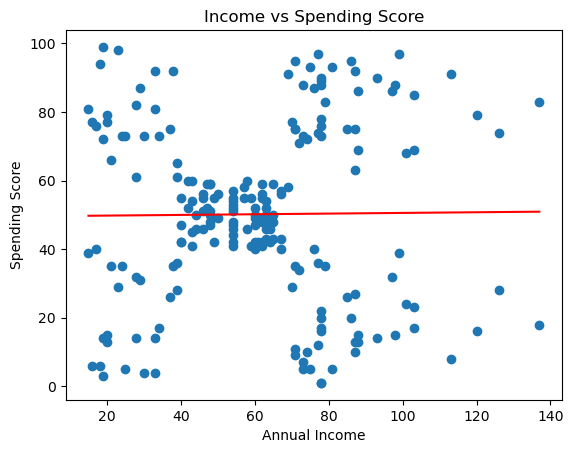

y = 0.01x + 49.61


In [9]:
# calculate the coefficients of the linear regression
coefficients = np.polyfit(data['Annual_Income_(k$)'], data['Spending_Score'], 1)
slope = coefficients[0]
intercept = coefficients[1]

# create the equation of the regression line
equation = np.poly1d(coefficients)
plt.scatter(data['Annual_Income_(k$)'],data['Spending_Score'])

# add the regression line to the plot
plt.plot(data['Annual_Income_(k$)'], slope * data['Annual_Income_(k$)'] + intercept, color='red')
#plt.text(100, 0, 'y = {:.2f}x + {:.2f}'.format(slope, intercept), color='red')

# add title and labels
plt.title('Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

# show the graph
plt.show()

print('y = {:.2f}x + {:.2f}'.format(slope, intercept))

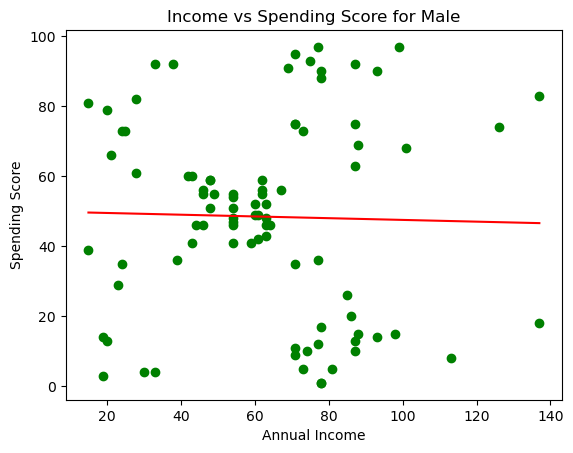

y = -0.02x + 50.05


In [10]:
# calculate the coefficients of the linear regression
coefficients = np.polyfit(male_data['Annual_Income_(k$)'], male_data['Spending_Score'], 1)
slope = coefficients[0]
intercept = coefficients[1]

# create the equation of the regression line
equation = np.poly1d(coefficients)
plt.scatter(male_data['Annual_Income_(k$)'],male_data['Spending_Score'],color='green')

# add the regression line to the plot
plt.plot(male_data['Annual_Income_(k$)'], slope * male_data['Annual_Income_(k$)'] + intercept, color='red')
#plt.text(100, 0, 'y = {:.2f}x + {:.2f}'.format(slope, intercept), color='red')

# add title and labels
plt.title('Income vs Spending Score for Male')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

# show the graph
plt.show()

print('y = {:.2f}x + {:.2f}'.format(slope, intercept))

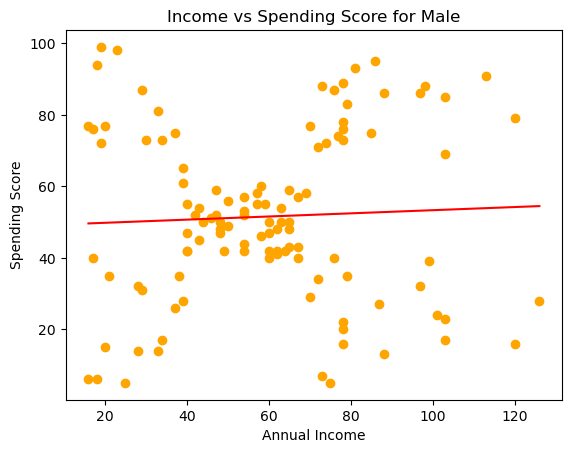

y = 0.04x + 48.92


In [11]:
# calculate the coefficients of the linear regression
coefficients = np.polyfit(female_data['Annual_Income_(k$)'], female_data['Spending_Score'], 1)
slope = coefficients[0]
intercept = coefficients[1]

# create the equation of the regression line
equation = np.poly1d(coefficients)
plt.scatter(female_data['Annual_Income_(k$)'],female_data['Spending_Score'],color='orange')

# add the regression line to the plot
plt.plot(female_data['Annual_Income_(k$)'], slope * female_data['Annual_Income_(k$)'] + intercept, color='red')
#plt.text(100, 2, 'y = {:.2f}x + {:.2f}'.format(slope, intercept), color='red')

# add title and labels
plt.title('Income vs Spending Score for Male')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

# show the graph
plt.show()

print('y = {:.2f}x + {:.2f}'.format(slope, intercept))

* There is no correlation between the annual income and spending score for the entire sample
* By Gender:
* For Male: We are observing a very marginal negative correlation between Annual Income and Spending Score
* For Female: Whereaes, for Females, there is a very minimal positive correlation between Annual Income and Spending Score

#### There exsists a relationship between Spending Habit and Age 

In [12]:
#check the correlation between Age and Spending Score
corr = data['Age'].corr(data['Spending_Score'])
print("Correlation between Age & Spending Score:",corr)
#There is no correlation between Annual Income and Spending score at an overall level

#Correlation between Annual Income and Spending Score by Gender
male_data = data[data['Genre']=='Male']
male_corr_spending_annual_income = male_data['Age'].corr(male_data['Spending_Score'])
print("Correlation between Age & Spending Score for Male:",male_corr_spending_annual_income)

#Correlation between Annual Income and Spending Score by Gender
female_data = data[data['Genre']=='Female']
female_corr_spending_annual_income = female_data['Age'].corr(female_data['Spending_Score'])
print("Correlation between Age & Spending Score for Female:",female_corr_spending_annual_income)

Correlation between Age & Spending Score: -0.32722684603909014
Correlation between Age & Spending Score for Male: -0.2796276462749313
Correlation between Age & Spending Score for Female: -0.3754385837780473


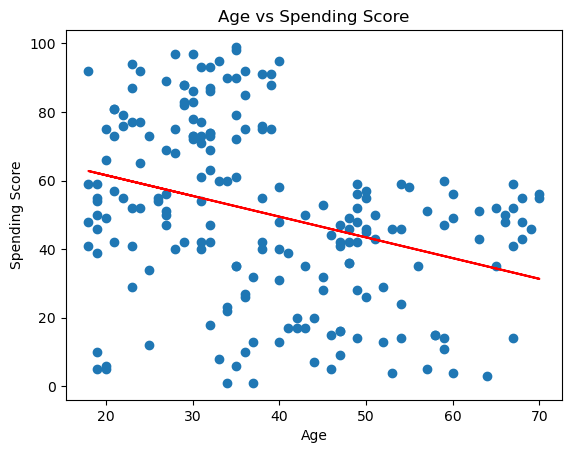

y = -0.60x + 73.70


In [13]:
# calculate the coefficients of the linear regression

coefficients = np.polyfit(data['Age'], data['Spending_Score'], 1)
slope = coefficients[0]
intercept = coefficients[1]

# create the equation of the regression line
equation = np.poly1d(coefficients)
plt.scatter(data['Age'],data['Spending_Score'])

# add the regression line to the plot
plt.plot(data['Age'], slope * data['Age'] + intercept, color='red')
#plt.text(100, 2, 'y = {:.2f}x + {:.2f}'.format(slope, intercept), color='red')


# add title and labels
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')

# show the graph
plt.show()

print('y = {:.2f}x + {:.2f}'.format(slope, intercept))

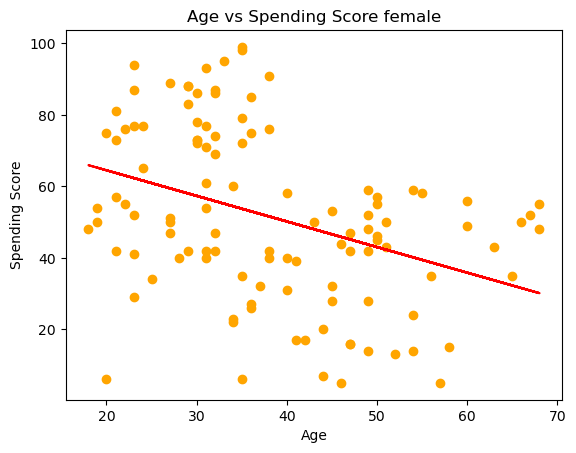

y = -0.72x + 78.81


In [14]:
# calculate the coefficients of the linear regression

coefficients = np.polyfit(female_data['Age'], female_data['Spending_Score'], 1)
slope = coefficients[0]
intercept = coefficients[1]

# create the equation of the regression line
equation = np.poly1d(coefficients)
plt.scatter(female_data['Age'],female_data['Spending_Score'],color='orange')

# add the regression line to the plot
plt.plot(female_data['Age'], slope * female_data['Age'] + intercept, color='red')
#plt.text(100, 2, 'y = {:.2f}x + {:.2f}'.format(slope, intercept), color='red')


# add title and labels
plt.title('Age vs Spending Score female')
plt.xlabel('Age')
plt.ylabel('Spending Score')

# show the graph
plt.show()
print('y = {:.2f}x + {:.2f}'.format(slope, intercept))

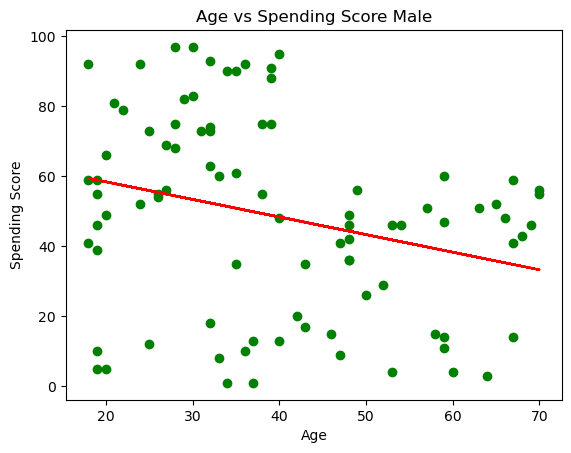

y = -0.50x + 68.53


In [15]:
# calculate the coefficients of the linear regression

coefficients = np.polyfit(male_data['Age'], male_data['Spending_Score'], 1)
slope = coefficients[0]
intercept = coefficients[1]

# create the equation of the regression line
equation = np.poly1d(coefficients)
plt.scatter(male_data['Age'],male_data['Spending_Score'],color='green')

# add the regression line to the plot
plt.plot(male_data['Age'], slope * male_data['Age'] + intercept, color='red')
#plt.text(100, 2, 'y = {:.2f}x + {:.2f}'.format(slope, intercept), color='red')


# add title and labels
plt.title('Age vs Spending Score Male')
plt.xlabel('Age')
plt.ylabel('Spending Score')

# show the graph
plt.show()
print('y = {:.2f}x + {:.2f}'.format(slope, intercept))

* There exists negative correlation between the age and spending score for the entire sample
* Younger people spend more and as the age increases, people become more frugal and spend less
* By Gender:
* This behaviour is more prominent in Females incomparison to Male
* Here is a detailed breakup by bucketing the age in bins:

In [16]:
####Group the Age in Bins and analyze the spending score
data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [17]:
data['Age_bins']=pd.cut(data['Age'],bins=[18,20,25,30,35,40,45,50,55,60,65,70],right=True)

In [18]:
data.groupby(['Age_bins'])['Spending_Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Age_bins,,,,,,,,
"(18, 20]",13.0,39.923077,24.844387,5.0,10.00,49.0,55.00,75.0
"(20, 25]",21.0,63.285714,22.260150,12.0,52.00,73.0,79.00,94.0
"(25, 30]",24.0,70.666667,17.397318,40.0,54.75,73.0,83.75,97.0
"(30, 35]",36.0,60.305556,28.024295,1.0,41.50,66.0,80.75,99.0
"(35, 40]",24.0,53.291667,30.214421,1.0,30.00,51.5,78.25,95.0
"(40, 45]",12.0,27.916667,14.228386,7.0,17.00,24.0,36.00,53.0
"(45, 50]",26.0,37.384615,16.035154,5.0,26.50,42.0,47.75,59.0
"(50, 55]",11.0,35.090909,19.180483,4.0,19.00,43.0,48.00,59.0
"(55, 60]",12.0,30.166667,21.446904,4.0,13.25,25.0,49.50,60.0


In [19]:
data.groupby(['Age_bins','Genre'])['Spending_Score'].describe()

count       mean        std   min    25%   50%    75%   max
Age_bins Genre                                                              
(18, 20] Female    4.0  46.250000  28.987066   6.0  39.00  52.0  59.25  75.0
         Male      9.0  37.111111  24.121797   5.0  10.00  46.0  55.00  66.0
(20, 25] Female   15.0  62.666667  20.119879  29.0  47.00  65.0  77.00  94.0
         Male      6.0  64.833333  29.061429  12.0  57.25  76.0  80.50  92.0
(25, 30] Female   14.0  68.571429  18.533605  40.0  50.25  73.0  85.25  89.0
         Male     10.0  73.600000  16.153431  54.0  59.00  72.0  82.75  97.0
(30, 35] Female   23.0  62.260870  26.428665   6.0  42.00  69.0  82.50  99.0
         Male     13.0  56.846154  31.461209   1.0  35.00  63.0  74.00  93.0
(35, 40] Female   12.0  51.916667  23.895448  26.0  31.75  41.0  75.25  91.0
         Male     12.0  54.666667  36.519816   1.0  13.00  65.0  88.75  95.0
(40, 45] Female    9.0  29.222222  15.730367   7.0  17.00  28.0  39.00  53.0
         Male      3.0  24.000000   9.643651  17.0  18.50  20.0  27.50  35.0
(45, 50] Female   16.0  38.500000  17.084106   5.0  25.00  44.5  49.00  59.0
         Male     10.0  35.600000  14.901156   9.0  28.50  38.5  45.00  56.0
(50, 55] Female    7.0  37.285714  20.014281  13.0  19.00  43.0  54.00  59.0
         Male      4.0  31.250000  19.855730   4.0  22.75  37.5  46.00  46.0
(55, 60] Female    5.0  32.000000  21.748563   5.0  15.00  35.0  49.00  56.0
         Male      7.0  28.857143  22.872316   4.0  12.50  15.0  49.00  60.0
(60, 65] Female    2.0  39.000000   5.656854  35.0  37.00  39.0  41.00  43.0
         Male      3.0  35.333333  28.005952   3.0  27.00  51.0  51.50  52.0
(65, 70] Female    4.0  51.250000   2.986079  48.0  49.50  51.0  52.75  55.0
         Male      8.0  45.250000  14.179966  14.0  42.50  47.0  55.25  59.0

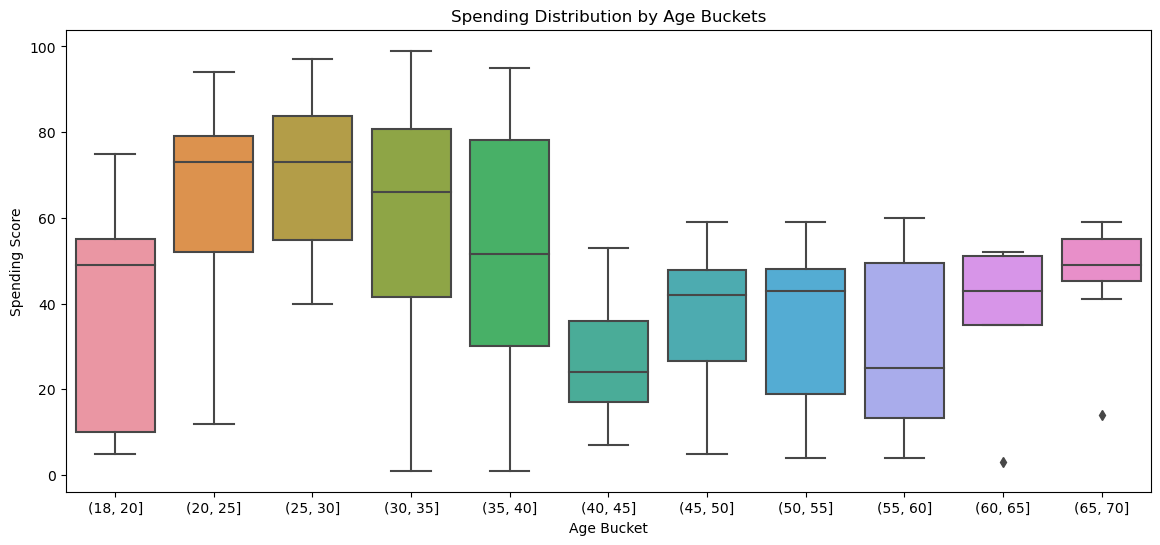

In [28]:
fig = plt.figure(figsize=(14, 6))

# create a box plot using Seaborn
sns.boxplot(x='Age_bins', y='Spending_Score', data=data)

# add title and labels
plt.title('Spending Distribution by Age Buckets')
plt.xlabel('Age Bucket')
plt.ylabel('Spending Score')

# display the plot
plt.show()

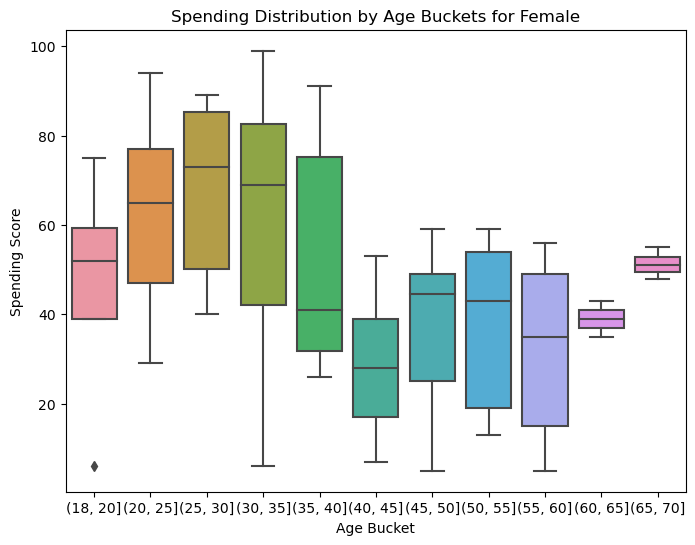

In [22]:
#Correlation between Annual Income and Spending Score by Gender
female_data = data[data['Genre']=='Female']


fig = plt.figure(figsize=(8, 6))

# create a box plot using Seaborn
sns.boxplot(x='Age_bins', y='Spending_Score', data=female_data)

# add title and labels
plt.title('Spending Distribution by Age Buckets for Female')
plt.xlabel('Age Bucket')
plt.ylabel('Spending Score')

# display the plot
plt.show()

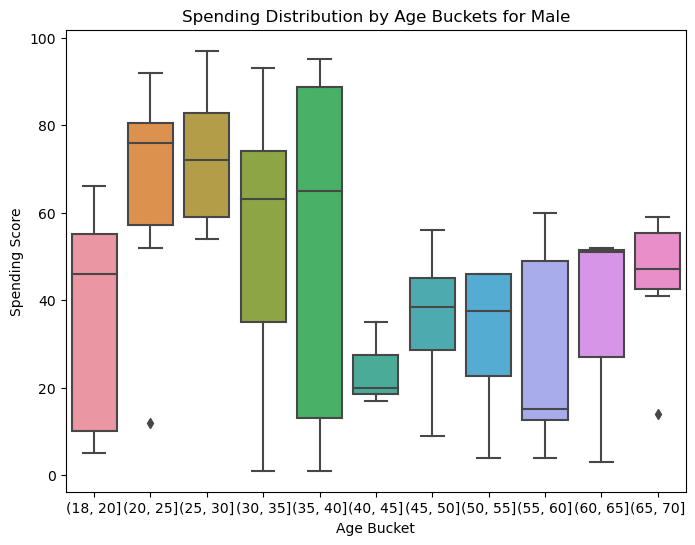

In [23]:
#Correlation between Annual Income and Spending Score by Gender
male_data = data[data['Genre']=='Male']


fig = plt.figure(figsize=(8, 6))

# create a box plot using Seaborn
sns.boxplot(x='Age_bins', y='Spending_Score', data=male_data)

# add title and labels
plt.title('Spending Distribution by Age Buckets for Male')
plt.xlabel('Age Bucket')
plt.ylabel('Spending Score')

# display the plot
plt.show()

In [24]:
female_data_age_bucket = female_data.groupby(['Age_bins'])['Spending_Score'].mean()
female_data_age_bucket = female_data_age_bucket.reset_index()
female_data_age_bucket['Gender']= 'Female'

male_data_age_bucket = male_data.groupby(['Age_bins'])['Spending_Score'].mean()
male_data_age_bucket = male_data_age_bucket.reset_index()
male_data_age_bucket['Gender']= 'Male'

In [26]:
age_bucket_spending_habit = female_data_age_bucket.append(male_data_age_bucket,ignore_index=True)
age_bucket_spending_habit

,Age_bins,Spending_Score,Gender
0,"(18, 20]",46.250000,Female
1,"(20, 25]",62.666667,Female
2,"(25, 30]",68.571429,Female
3,"(30, 35]",62.260870,Female
4,"(35, 40]",51.916667,Female
5,"(40, 45]",29.222222,Female
6,"(45, 50]",38.500000,Female
7,"(50, 55]",37.285714,Female
8,"(55, 60]",32.000000,Female
9,"(60, 65]",39.000000,Female


#### Clustering Excercise

* To Analyze the overall behaviour on spendings, 
* we are going to find inherent patterns within the data by using K-Means clustering

In [30]:
clustering_dataset = data.loc[:,['CustomerID','Genre','Age','Annual_Income_(k$)','Spending_Score']]

gender_map ={'Male':0,'Female':1}
clustering_dataset['Gender']=clustering_dataset['Genre'].map(gender_map)

In [31]:
clustering_dataset.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Gender
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [32]:
#write a code to scale the variables so all the datapoints are weighted equally
from sklearn.preprocessing import StandardScaler


variables_to_scale = ['Age','Annual_Income_(k$)','Spending_Score']
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the dataset
scaler.fit(clustering_dataset[variables_to_scale])

# Transform the dataset to standardized values
X_std = scaler.transform(clustering_dataset[variables_to_scale])


Age_scaled = X_std[:,0]
Annual_income_scaled = X_std[:,1]
Spending_score_scaled = X_std[:,2]

clustering_dataset['Age_scaled'] = Age_scaled
clustering_dataset['Annual_income_scaled'] = Annual_income_scaled
clustering_dataset['Spending_score_scaled'] = Spending_score_scaled


In [33]:
clustering_dataset.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Gender,Age_scaled,Annual_income_scaled,Spending_score_scaled
0,1,Male,19,15,39,0,-1.424569,-1.738999,-0.434801
1,2,Male,21,15,81,0,-1.281035,-1.738999,1.195704
2,3,Female,20,16,6,1,-1.352802,-1.700830,-1.715913
3,4,Female,23,16,77,1,-1.137502,-1.700830,1.040418
4,5,Female,31,17,40,1,-0.563369,-1.662660,-0.395980


In [ ]:
# Rescale the standardized dataset back to the original range
# X_rescaled = scaler.inverse_transform(X_std)

# # Print the rescaled dataset
# print(X_rescaled)

In [35]:
#clutering columns
clustering_columns=['Age','Age_scaled','Annual_income_scaled','Spending_score_scaled']

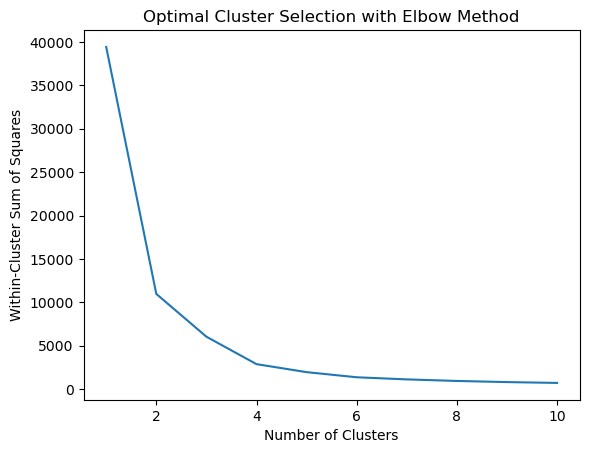

In [36]:
# calculate the within-cluster sum of squares for different values of K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(clustering_dataset[clustering_columns])
    wcss.append(kmeans.inertia_)

# plot the within-cluster sum of squares as a function of K
plt.plot(range(1, 11), wcss)
plt.title("Optimal Cluster Selection with Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares")
plt.show()

* From Visual Inspection it is observed that Optimal value of K can be selected as 2, 3 or 4 as that is where the elbow is formed

In [37]:
#Based on Elbow curve visual, 4 appears to be optimal number of clusters
#Starting with K=4

optimal_k=4

kmeans = KMeans(n_clusters=optimal_k, init="k-means++", max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(clustering_dataset[clustering_columns])

clustering_dataset['Cluster_label'] = cluster_labels

In [38]:
clustering_dataset['Cluster_label'].value_counts()

0    74
3    50
2    47
1    29
Name: Cluster_label, dtype: int64

In [39]:
clustering_dataset.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Gender,Age_scaled,Annual_income_scaled,Spending_score_scaled,Cluster_label
0,1,Male,19,15,39,0,-1.424569,-1.738999,-0.434801,3
1,2,Male,21,15,81,0,-1.281035,-1.738999,1.195704,3
2,3,Female,20,16,6,1,-1.352802,-1.700830,-1.715913,3
3,4,Female,23,16,77,1,-1.137502,-1.700830,1.040418,3
4,5,Female,31,17,40,1,-0.563369,-1.662660,-0.395980,0


In [41]:
clustering_dataset.groupby(['Cluster_label'])['Spending_Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster_label,,,,,,,,
0,74.0,60.148649,28.221571,1.0,40.00,71.5,84.5,99.0
1,29.0,38.379310,18.872531,3.0,15.00,47.0,52.0,60.0
2,47.0,34.829787,16.643734,4.0,18.50,41.0,47.5,59.0
3,50.0,56.780000,23.561721,5.0,46.25,55.0,75.0,97.0


In [42]:
clustering_dataset.groupby(['Cluster_label'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster_label,,,,,,,,
0,74.0,34.229730,3.505562,29.0,31.0,34.0,37.0,41.0
1,29.0,63.275862,4.471310,56.0,59.0,64.0,67.0,70.0
2,47.0,48.340426,3.421648,42.0,46.0,48.0,50.0,55.0
3,50.0,22.600000,3.251373,18.0,20.0,22.5,25.0,28.0


In [43]:
clustering_dataset.groupby(['Cluster_label'])['Annual_Income_(k$)'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster_label,,,,,,,,
0,74.0,69.878378,29.944219,17.0,44.25,74.5,87.0,137.0
1,29.0,53.689655,18.384977,19.0,46.00,54.0,63.0,93.0
2,47.0,59.829787,23.303591,23.0,43.00,58.0,72.0,126.0
3,50.0,51.440000,22.766929,15.0,33.00,55.5,66.5,101.0


In [58]:
cluster_by_gender = clustering_dataset.groupby(['Cluster_label'])['Genre'].value_counts()
print(cluster_by_gender)

Cluster_label  Genre 
0              Female    46
               Male      28
1              Male      18
               Female    11
2              Female    30
               Male      17
3              Female    25
               Male      25
Name: Genre, dtype: int64


In [71]:
#Create cluster profile mapping
cluster_map = {0:'Extravagant_Spending_Adults '
               ,1:'Modest_Spending_Seniors'
               ,2:'Middle_Aged_low_Spenders'
               ,3:'High_Spending_Youth'}

clustering_dataset['Cluster_name']= clustering_dataset['Cluster_label'].map(cluster_map)

In [72]:
clustering_dataset.groupby(['Cluster_name'])['Spending_Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster_name,,,,,,,,
Extravagant_Spending_Adults,74.0,60.148649,28.221571,1.0,40.00,71.5,84.5,99.0
High_Spending_Youth,50.0,56.780000,23.561721,5.0,46.25,55.0,75.0,97.0
Middle_Aged_low_Spenders,47.0,34.829787,16.643734,4.0,18.50,41.0,47.5,59.0
Modest_Spending_Seniors,29.0,38.379310,18.872531,3.0,15.00,47.0,52.0,60.0


In [73]:
clustering_dataset.groupby(['Cluster_name'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster_name,,,,,,,,
Extravagant_Spending_Adults,74.0,34.229730,3.505562,29.0,31.0,34.0,37.0,41.0
High_Spending_Youth,50.0,22.600000,3.251373,18.0,20.0,22.5,25.0,28.0
Middle_Aged_low_Spenders,47.0,48.340426,3.421648,42.0,46.0,48.0,50.0,55.0
Modest_Spending_Seniors,29.0,63.275862,4.471310,56.0,59.0,64.0,67.0,70.0


In [74]:
clustering_dataset.groupby(['Cluster_name'])['Annual_Income_(k$)'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster_name,,,,,,,,
Extravagant_Spending_Adults,74.0,69.878378,29.944219,17.0,44.25,74.5,87.0,137.0
High_Spending_Youth,50.0,51.440000,22.766929,15.0,33.00,55.5,66.5,101.0
Middle_Aged_low_Spenders,47.0,59.829787,23.303591,23.0,43.00,58.0,72.0,126.0
Modest_Spending_Seniors,29.0,53.689655,18.384977,19.0,46.00,54.0,63.0,93.0


In [75]:
clustering_dataset.groupby(['Cluster_name'])['Genre'].value_counts()

Cluster_name                  Genre 
Extravagant_Spending_Adults   Female    46
                              Male      28
High_Spending_Youth           Female    25
                              Male      25
Middle_Aged_low_Spenders      Female    30
                              Male      17
Modest_Spending_Seniors       Male      18
                              Female    11
Name: Genre, dtype: int64

In [76]:
clustering_dataset

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Gender,Age_scaled,Annual_income_scaled,Spending_score_scaled,Cluster_label,Cluster_name
0,1,Male,19,15,39,0,-1.424569,-1.738999,-0.434801,3,High_Spending_Youth
1,2,Male,21,15,81,0,-1.281035,-1.738999,1.195704,3,High_Spending_Youth
2,3,Female,20,16,6,1,-1.352802,-1.700830,-1.715913,3,High_Spending_Youth
3,4,Female,23,16,77,1,-1.137502,-1.700830,1.040418,3,High_Spending_Youth
4,5,Female,31,17,40,1,-0.563369,-1.662660,-0.395980,0,Extravagant_Spending_Adults
5,6,Female,22,17,76,1,-1.209269,-1.662660,1.001596,3,High_Spending_Youth
6,7,Female,35,18,6,1,-0.276302,-1.624491,-1.715913,0,Extravagant_Spending_Adults
7,8,Female,23,18,94,1,-1.137502,-1.624491,1.700384,3,High_Spending_Youth
8,9,Male,64,19,3,0,1.804932,-1.586321,-1.832378,1,Modest_Spending_Seniors
9,10,Female,30,19,72,1,-0.635135,-1.586321,0.846310,0,Extravagant_Spending_Adults


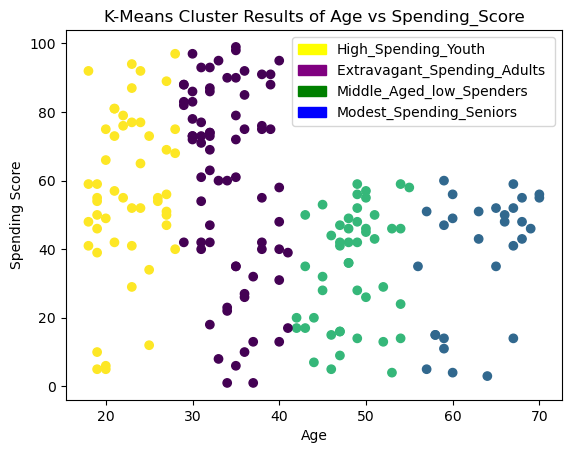

In [98]:
# plot the clusters
from matplotlib.patches import Patch
colors = ['yellow', 'purple', 'green', 'blue']
labels = ['High_Spending_Youth', 'Extravagant_Spending_Adults ', 'Middle_Aged_low_Spenders','Modest_Spending_Seniors']
plt.scatter( clustering_dataset.loc[:, ['Age']],clustering_dataset.loc[:, ['Spending_Score']], c=clustering_dataset['Cluster_label'], cmap="viridis")
plt.title("K-Means Cluster Results of Age vs Spending_Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend([3],prop={'size': 12}, bbox_to_anchor=(1.05, 1), loc='upper left')
legend_patches = [Patch(color=color, label=label) for color, label in zip(colors,labels)]

# Add a legend
plt.legend(handles=legend_patches)





plt.show()

In [104]:
#Save the model file and interfaces for scoring
import pickle

# Save the StandardScaler object to a file
with open('/Users/ankit/Data-Science/MTN Group/Customer Spend Behvarioural analytics/Output/standard_scalar.pkl', 'wb') as f:
    pickle.dump(scaler, f)
    
# Save the KMeans object to a file
with open('/Users/ankit/Data-Science/MTN Group/Customer Spend Behvarioural analytics/Output/kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

In [106]:
# Load the StandardScaler object from the file
with open('/Users/ankit/Data-Science/MTN Group/Customer Spend Behvarioural analytics/Output/standard_scalar.pkl', 'rb') as f:
    scaler_loaded = pickle.load(f)
    
with open('/Users/ankit/Data-Science/MTN Group/Customer Spend Behvarioural analytics/Output/kmeans.pkl', 'rb') as f:
    kmeans_loaded = pickle.load(f)

In [107]:
#read the input data
new_data = pd.read_csv('/Users/ankit/Data-Science/MTN Group/Customer Spend Behvarioural analytics/Input/Mall_customers.csv')

gender_map ={'Male':0,'Female':1}
new_data['Gender']=new_data['Genre'].map(gender_map)

variables_to_scale = ['Age','Annual_Income_(k$)','Spending_Score']

# Transform the dataset to standardized values
X_std = scaler_loaded.transform(clustering_dataset[variables_to_scale])


Age_scaled = X_std[:,0]
Annual_income_scaled = X_std[:,1]
Spending_score_scaled = X_std[:,2]

new_data['Age_scaled'] = Age_scaled
new_data['Annual_income_scaled'] = Annual_income_scaled
new_data['Spending_score_scaled'] = Spending_score_scaled

In [108]:
#clutering columns
clustering_columns=['Age','Age_scaled','Annual_income_scaled','Spending_score_scaled']
labels = kmeans_loaded.predict(new_data[clustering_columns])

In [110]:
new_data['Cluster_label']=labels
#Create cluster profile mapping
cluster_map = {0:'Extravagant_Spending_Adults '
               ,1:'Modest_Spending_Seniors'
               ,2:'Middle_Aged_low_Spenders'
               ,3:'High_Spending_Youth'}

new_data['Cluster_name']= new_data['Cluster_label'].map(cluster_map)

In [111]:
new_data['Cluster_name'].value_counts()

Extravagant_Spending_Adults     74
High_Spending_Youth             50
Middle_Aged_low_Spenders        47
Modest_Spending_Seniors         29
Name: Cluster_name, dtype: int64

#### End of Script

----------------------------------------